In [1]:
%matplotlib notebook

import matplotlib
matplotlib.rcParams['svg.fonttype'] = 'none'
font = {'family' : 'Arial',
    'weight' : 'medium',
    'size'   : 20,
    'style'  : 'normal'}

matplotlib.rc('font', **font)
# The above is necessary to have all text in the saved svg as Arial text.
# Makes modification of figure in illustrator much easier.

Compare all conditions between SF and wildtype with appropriate statistical tests.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import json

# Import shared_functions
import sys
import os
sys.path.insert(0, str(Path(os.getcwd()).parent))
import shared_functions

C:\Users\tadres\Miniconda3\envs\depol_block_publication\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
root_path = Path('G:\\My Drive\\PhD\\Papers\\Vanishing spikes\\all_data\Behavior')
#savepath = Path('G:\\My Drive\\PhD\\Papers\\Vanishing spikes\\plots\\Fig4\\DST')
savepath = 'Declare path'
#savepath_for_stats = Path('G:\\Shared drives\\LouisLab COLLABORATIVE Vanishing Spikes\\stats_files')
savepath_for_stats = 'Declare path'

EtB_conc_to_comp = [
    'EtB 10uM',
    'EtB 100uM',
    'EtB 1mM',
    'EtB 10mM',
    'EtB 50mM',
    'EtB 75mM',
    'EtB 100mM'
]
start_time = 0
end_time = 180

In [4]:
def plot_pairwise_comparisons(comparison, concentration, colors, savename, path=None):

    all_data_dict = {}
    all_data_export = []

    for current_conc in concentration:
        print(Path(path, current_conc))

        df_1 = None
        df_2 = None

        for current_genotype in comparison:
            current_path = Path(path, current_conc, current_genotype)

            median_DTS = []

            for current_folder in current_path.iterdir():
                if current_folder.is_dir():
                    current_DTS = pd.read_csv(Path(current_folder, 'distance_to_source.csv'))

                    with open(Path(current_folder, 'experiment_settings.json'), 'r') as file:
                        experiment_settings = json.load(file)
                    fps = experiment_settings['Framerate']
                    median_DTS.append(np.nanmedian(current_DTS['0'][int(round(start_time*fps)):int(round(end_time*fps))]))
            median_DTS = np.array(median_DTS) 

            data_as_dict = {'Group': current_genotype,
                            'median_DTS': median_DTS}
            
            data_as_dict_export = {'Group': current_genotype + ' ' + current_conc,
                                    'median_DTS': median_DTS}
            if df_1 is None:
                df_1 = pd.DataFrame(data_as_dict)
                df_1_export = pd.DataFrame(data_as_dict_export)
            else:
                df_2 = pd.DataFrame(data_as_dict)
                df_2_export = pd.DataFrame(data_as_dict_export)

        df_for_stats = pd.concat([df_1, df_2], ignore_index=True)
        all_data_dict[current_conc] = df_for_stats
        
        df_for_stats_export = pd.concat([df_1_export, df_2_export], ignore_index=True)
        all_data_export.append(df_for_stats_export) # Easier to pipe into the export function

    all_conc = []
    fig = plt.figure(figsize=(13,5))
    ax = fig.add_subplot(111)

    for counter, current_conc in enumerate(all_data_dict):
        current_data = all_data_dict[current_conc]
        labels = current_data.drop_duplicates(subset = ["Group"])['Group'] #extract unique group names
        label_list = []
        [label_list.append(i) for i in labels] # put them into a list

        p_value = shared_functions.calc_stats(current_data,labels=label_list, parametric=False, printout=True)
        for i in p_value:
            p_value_only = p_value[i]
        for i in range(2):
            if i == 0:
                x_pos = counter-1*0.18
            else:
                x_pos = counter+1*0.18
            print(x_pos)
            current_label = label_list[i]
            data_to_plot = current_data[current_data['Group'] == current_label]['median_DTS']
            ax.boxplot(data_to_plot,
                      positions=[x_pos],
                      widths=0.3, 
                      showfliers=False, notch=True)

            x_scatter = np.random.normal(x_pos, 0.02, size=data_to_plot.shape[0])
            ax.scatter(x_scatter, data_to_plot, c=colors[i], alpha=0.5) #label=current_label)

            ax.text(counter,60,'p= ' + repr(round(p_value_only,4)),
                   fontsize=15)

        all_conc.append(current_conc)
    ax.set_xticks(np.arange(0 ,counter+1,1))
    ax.set_xticklabels(all_conc, fontsize=15)
    ax.set_ylim(0,60)
    ax.invert_yaxis()

    # fig.savefig(Path(savepath, savename)) # uncomment to save plot
    
    return(all_data_export)

G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\EtB\EtB 10uM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\EtB\EtB 100uM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\EtB\EtB 1mM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\EtB\EtB 10mM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\EtB\EtB 50mM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\EtB\EtB 75mM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\EtB\EtB 100mM


<IPython.core.display.Javascript object>


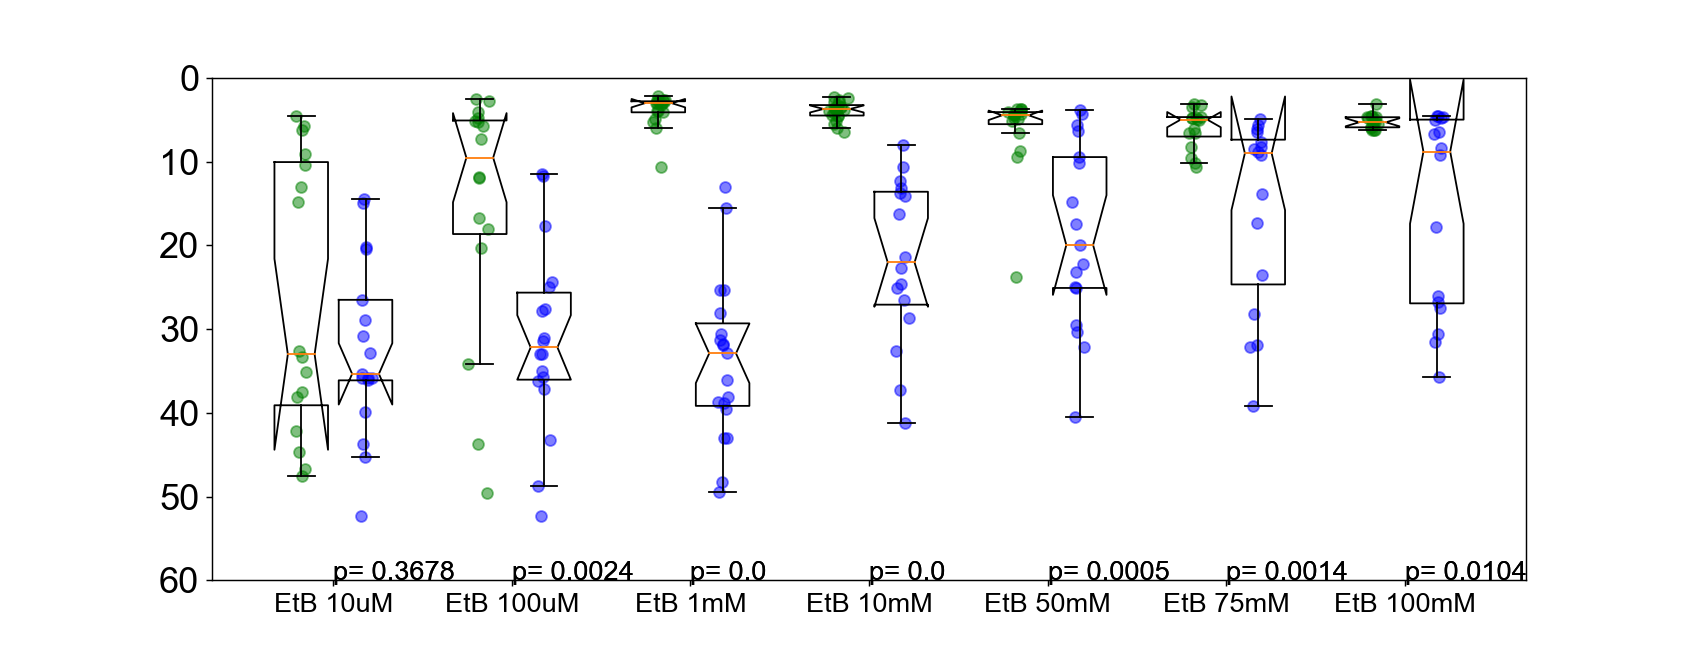

comparing w1118 (MS28) with Or1a SF (MS53xMS133)
w1118 (MS28)
lilliefors(0.21104683090429144, 0.05388774114305295)


Or1a SF (MS53xMS133)
lilliefors(0.14270826742745324, 0.4663485289766398)


levene: LeveneResult(statistic=4.385317905885632, pvalue=0.044520296826783684)
ranksums test: RanksumsResult(statistic=-0.900547699552639, pvalue=0.3678288529885996)
-0.18
0.18
comparing w1118 (MS28) with Or1a SF (MS53xMS133)
w1118 (MS28)
lilliefors(0.2122773262694888, 0.05076022395829831)


Or1a SF (MS53xMS133)
lilliefors(0.12971247604720015, 0.5747042249355445)


levene: LeveneResult(statistic=0.5417951311516955, pvalue=0.4670514553953773)
ranksums test: RanksumsResult(statistic=-3.0362884611063587, pvalue=0.0023951010516097006)
0.8200000000000001
1.18
comparing w1118 (MS28) with Or1a SF (MS53xMS133)
w1118 (MS28)
lilliefors(0.2287209655051815, 0.01951221627120204)


Or1a SF (MS53xMS133)
lilliefors(0.10881501099186192, 0.7900426149640819)


levene: LeveneResult(statistic=17.286628624684113, pvalu

In [5]:
EtB_path = Path(root_path, 'EtB')

EtB_conc_to_comp = [
    'EtB 10uM',
    'EtB 100uM',
    'EtB 1mM',
    'EtB 10mM',
    'EtB 50mM',
    'EtB 75mM',
    'EtB 100mM'
]

comparison = [
    'w1118 (MS28)',
    'Or1a SF (MS53xMS133)'
]
colors = ['green', 'blue']

df_for_export = plot_pairwise_comparisons(comparison, EtB_conc_to_comp, colors, savename='w1118_vs_Or1a_EtB.svg', path=EtB_path)

#export_pairwise_test
# For export, first correct the label names
corrected_group_names = []

for current_data in df_for_export:
    labels = current_data.drop_duplicates(subset = ["Group"])['Group'] #extract unique group names
    print(labels)


    temp_data = current_data.replace(
        ['w1118 (MS28) EtB 10uM', 'Or1a SF (MS53xMS133) EtB 10uM', 
         'w1118 (MS28) EtB 100uM', 'Or1a SF (MS53xMS133) EtB 100uM', 
         'w1118 (MS28) EtB 1mM', 'Or1a SF (MS53xMS133) EtB 1mM',
         'w1118 (MS28) EtB 10mM', 'Or1a SF (MS53xMS133) EtB 10mM',
         'w1118 (MS28) EtB 50mM', 'Or1a SF (MS53xMS133) EtB 50mM',
         'w1118 (MS28) EtB 75mM', 'Or1a SF (MS53xMS133) EtB 75mM',
         'w1118 (MS28) EtB 100mM', 'Or1a SF (MS53xMS133) EtB 100mM'],
        
        ['wild type 1:7.5e5', ' Or1a SF, 1:7.5e5', 
         'wild type 1:7.5e4', 'Or1a SF 1:7.5e4', 
         'wild type 1:7.5e3', 'Or1a SF 1:7.5e3',
         'wild type 1:750', 'Or1a SF 1:750',
         'wild type 1:150', 'Or1a SF 1:150',
         'wild type 1:100', 'Or1a SF 1:100',
         'wild type 1:75', 'Or1a SF 1:75']
        )
    
    corrected_group_names.append(temp_data)
    
    new_labels = temp_data.drop_duplicates(subset = ["Group"])['Group'] #extract unique group names
    print(new_labels)
    
shared_functions.export_pairwise_test(corrected_group_names, savepath=savepath_for_stats,
                                      savename='SIFig5A_Or1a', parametric=False,
                                      no_of_groups=14)

G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\EtB\EtB 10uM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\EtB\EtB 100uM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\EtB\EtB 1mM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\EtB\EtB 10mM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\EtB\EtB 50mM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\EtB\EtB 75mM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\EtB\EtB 100mM


<IPython.core.display.Javascript object>


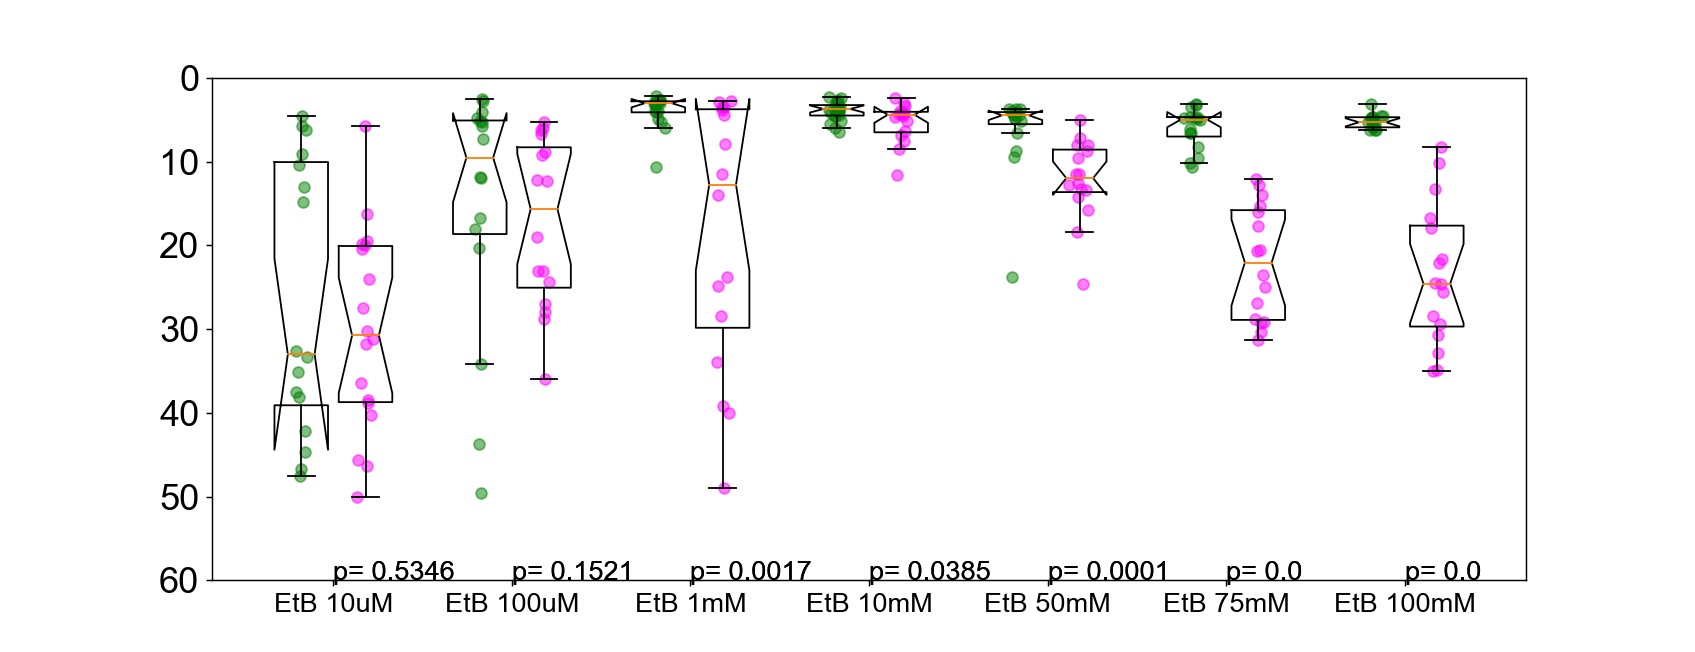

comparing w1118 (MS28) with Or42b SF (MS92xMS133)
w1118 (MS28)
lilliefors(0.21104683090429144, 0.05388774114305295)


Or42b SF (MS92xMS133)
lilliefors(0.12474368974056205, 0.6361620173202156)


levene: LeveneResult(statistic=2.5287129621986573, pvalue=0.12162373125711742)
ranksums test: RanksumsResult(statistic=-0.6210590034081188, pvalue=0.5345608020345052)
-0.18
0.18
comparing w1118 (MS28) with Or42b SF (MS92xMS133)
w1118 (MS28)
lilliefors(0.2122773262694888, 0.05076022395829831)


Or42b SF (MS92xMS133)
lilliefors(0.18740975785284947, 0.14504367203326074)


levene: LeveneResult(statistic=0.276088944158775, pvalue=0.6031385670522751)
ranksums test: RanksumsResult(statistic=-1.4321788867443772, pvalue=0.1520926324815797)
0.8200000000000001
1.18
comparing w1118 (MS28) with Or42b SF (MS92xMS133)
w1118 (MS28)
lilliefors(0.2287209655051815, 0.01951221627120204)


Or42b SF (MS92xMS133)
lilliefors(0.18479879514093145, 0.15980977894297385)


levene: LeveneResult(statistic=25.231985930350334, 

In [7]:
comparison = [
    'w1118 (MS28)',
    'Or42b SF (MS92xMS133)'
]
colors = ['green', 'magenta']

df_for_export = plot_pairwise_comparisons(comparison, EtB_conc_to_comp, colors, 
                                          savename='w1118_vs_Or42b_EtB.svg', path=EtB_path)


#export_pairwise_test
# For export, first correct the label names
corrected_group_names = []

for current_data in df_for_export:
    labels = current_data.drop_duplicates(subset = ["Group"])['Group'] #extract unique group names
    print(labels)


    temp_data = current_data.replace(
        ['w1118 (MS28) EtB 10uM', 'Or42b SF (MS92xMS133) EtB 10uM', 
         'w1118 (MS28) EtB 100uM', 'Or42b SF (MS92xMS133) EtB 100uM', 
         'w1118 (MS28) EtB 1mM', 'Or42b SF (MS92xMS133) EtB 1mM',
         'w1118 (MS28) EtB 10mM', 'Or42b SF (MS92xMS133) EtB 10mM',
         'w1118 (MS28) EtB 50mM', 'Or42b SF (MS92xMS133) EtB 50mM',
         'w1118 (MS28) EtB 75mM', 'Or42b SF (MS92xMS133) EtB 75mM',
         'w1118 (MS28) EtB 100mM', 'Or42b SF (MS92xMS133) EtB 100mM'],
        
        ['wild type 1:7.5e5', ' Or42b SF, 1:7.5e5', 
         'wild type 1:7.5e4', 'Or42b SF 1:7.5e4', 
         'wild type 1:7.5e3', 'Or42b SF 1:7.5e3',
         'wild type 1:750', 'Or42b SF 1:750',
         'wild type 1:150', 'Or42b SF 1:150',
         'wild type 1:100', 'Or42b SF 1:100',
         'wild type 1:75', 'Or42b SF 1:75']
        )
    
    corrected_group_names.append(temp_data)
    
    new_labels = temp_data.drop_duplicates(subset = ["Group"])['Group'] #extract unique group names
    print(new_labels)
    
shared_functions.export_pairwise_test(corrected_group_names, savepath=savepath_for_stats,
                                      savename='SIFig5A_Or42b', parametric=False,
                                      no_of_groups=14)

# PA:

G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\PA\PA 100uM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\PA\PA 1mM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\PA\PA 10mM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\PA\PA 100mM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\PA\PA 300mM


<IPython.core.display.Javascript object>


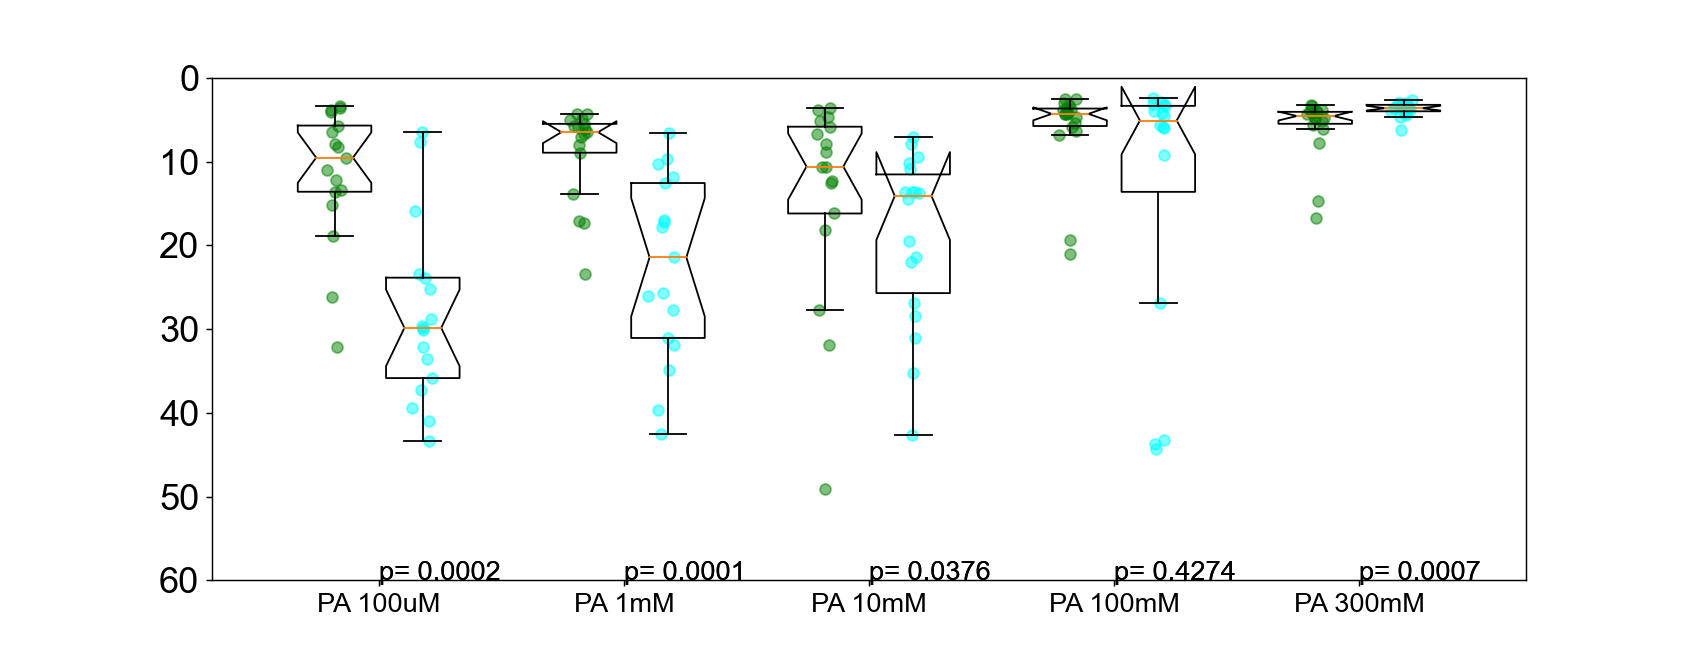

comparing w1118 (MS28) with Or42a SF (MS74xMS133)
w1118 (MS28)
lilliefors(0.16150037154950647, 0.2774039371130641)


Or42a SF (MS74xMS133)
lilliefors(0.15888766452388964, 0.3036733138368204)


levene: LeveneResult(statistic=0.7382173030840834, pvalue=0.39662340792444284)
ranksums test: RanksumsResult(statistic=-3.737123220526442, pvalue=0.00018613771731378938)
-0.18
0.18
comparing w1118 (MS28) with Or42a SF (MS74xMS133)
w1118 (MS28)
lilliefors(0.2726125627208802, 0.0018097375830169382)


Or42a SF (MS74xMS133)
lilliefors(0.13867476972513026, 0.5082669996704391)


levene: LeveneResult(statistic=9.871143669994204, pvalue=0.0036041786366575613)
ranksums test: RanksumsResult(statistic=-3.9093408804585357, pvalue=9.254829216205506e-05)
0.8200000000000001
1.18
comparing w1118 (MS28) with Or42a SF (MS74xMS133)
w1118 (MS28)
lilliefors(0.2502239138737134, 0.006111563490219193)


Or42a SF (MS74xMS133)
lilliefors(0.2278237698005039, 0.015356639742126518)


levene: LeveneResult(statistic=0.00101664

In [9]:
PA_path = Path(root_path, 'PA')

PA_conc_to_comp = [
    'PA 100uM',
    'PA 1mM',
    'PA 10mM',
    'PA 100mM',
    'PA 300mM']

comparison = [
    'w1118 (MS28)',
    'Or42a SF (MS74xMS133)'
]
colors = ['green', 'cyan']

df_for_export= plot_pairwise_comparisons(comparison, PA_conc_to_comp, colors, 
                                         savename='w1118_vs_Or42a_PA.svg', path=PA_path)


#export_pairwise_test
# For export, first correct the label names
corrected_group_names = []

for current_data in df_for_export:
    labels = current_data.drop_duplicates(subset = ["Group"])['Group'] #extract unique group names
    print(labels)


    temp_data = current_data.replace(
        ['w1118 (MS28) PA 100uM', 'Or42a SF (MS74xMS133) PA 100uM', 
         'w1118 (MS28) PA 1mM', 'Or42a SF (MS74xMS133) PA 1mM', 
         'w1118 (MS28) PA 10mM', 'Or42a SF (MS74xMS133) PA 10mM',
         'w1118 (MS28) PA 100mM', 'Or42a SF (MS74xMS133) PA 100mM',
         'w1118 (MS28) PA 300mM', 'Or42a SF (MS74xMS133) PA 300mM',],
        
        ['wild type 1:7e4','Or42a SF 1:7.7e4',
         'wild type 1:7e3', 'Or42a SF 1:7e3',
         'wild type 1:7e2', 'Or42a SF 1:7e2',
         'wild type 1:70', 'Or42a SF 1:70',
         'wild type 1:23', 'Or42a SF 1:23']
        )
    
    corrected_group_names.append(temp_data)
    
    new_labels = temp_data.drop_duplicates(subset = ["Group"])['Group'] #extract unique group names
    print(new_labels)
    
shared_functions.export_pairwise_test(corrected_group_names, savepath=savepath_for_stats,
                                      savename='SIFig5B_Or42a', parametric=False,
                                      no_of_groups=10)

G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\PA\PA 100uM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\PA\PA 1mM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\PA\PA 10mM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\PA\PA 100mM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\PA\PA 300mM


<IPython.core.display.Javascript object>


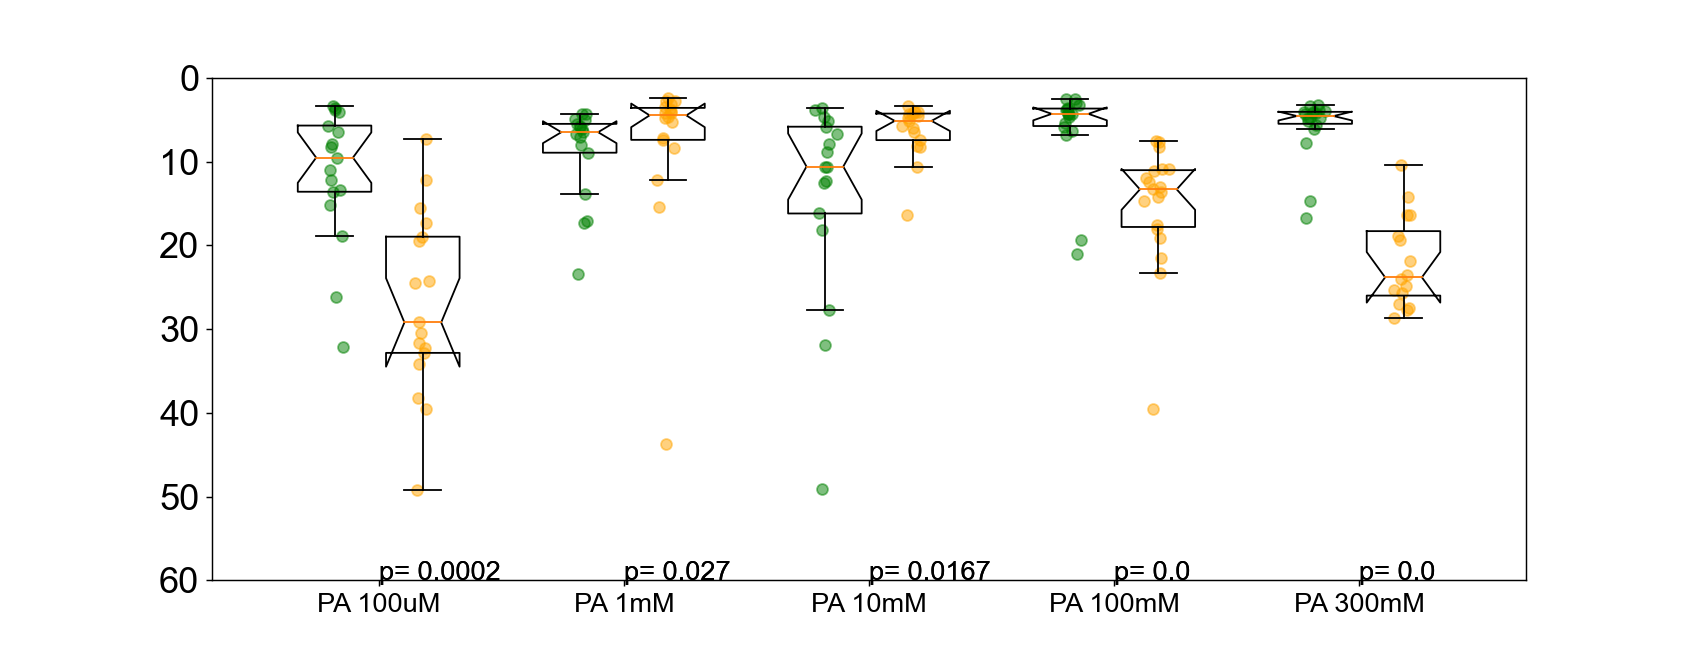

comparing w1118 (MS28) with Or13a SF (MS352xMS133)
w1118 (MS28)
lilliefors(0.16150037154950647, 0.2774039371130641)


Or13a SF (MS352xMS133)
lilliefors(0.11390454244495518, 0.7957528007969468)


levene: LeveneResult(statistic=1.887754938811425, pvalue=0.1790037426941974)
ranksums test: RanksumsResult(statistic=-3.7715667525128604, pvalue=0.00016222574650710526)
-0.18
0.18
comparing w1118 (MS28) with Or13a SF (MS352xMS133)
w1118 (MS28)
lilliefors(0.2726125627208802, 0.0018097375830169382)


Or13a SF (MS352xMS133)
lilliefors(0.30811980708119113, 0.0009999999999998899)


levene: LeveneResult(statistic=0.10328280099425768, pvalue=0.7499518812099972)
ranksums test: RanksumsResult(statistic=2.211329512647906, pvalue=0.027013027068735946)
0.8200000000000001
1.18
comparing w1118 (MS28) with Or13a SF (MS352xMS133)
w1118 (MS28)
lilliefors(0.2502239138737134, 0.006111563490219193)


Or13a SF (MS352xMS133)
lilliefors(0.19758356917298614, 0.07406816450413997)


levene: LeveneResult(statistic=5.3852

In [11]:
comparison = [
    'w1118 (MS28)',
    'Or13a SF (MS352xMS133)'
]
colors = ['green', 'orange']

df_for_export = plot_pairwise_comparisons(comparison, PA_conc_to_comp, colors, 
                                          savename='w1118_vs_Or13a_PA.svg', path=PA_path)

#export_pairwise_test
# For export, first correct the label names
corrected_group_names = []

for current_data in df_for_export:
    labels = current_data.drop_duplicates(subset = ["Group"])['Group'] #extract unique group names
    print(labels)


    temp_data = current_data.replace(
        ['w1118 (MS28) PA 100uM', 'Or13a SF (MS352xMS133) PA 100uM', 
         'w1118 (MS28) PA 1mM', 'Or13a SF (MS352xMS133) PA 1mM', 
         'w1118 (MS28) PA 10mM', 'Or13a SF (MS352xMS133) PA 10mM',
         'w1118 (MS28) PA 100mM', 'Or13a SF (MS352xMS133) PA 100mM',
         'w1118 (MS28) PA 300mM', 'Or13a SF (MS352xMS133) PA 300mM',],
        
        ['wild type 1:7e4','Or13a SF 1:7.7e4',
         'wild type 1:7e3', 'Or13a SF 1:7e3',
         'wild type 1:7e2', 'Or13a SF 1:7e2',
         'wild type 1:70', 'Or13a SF 1:70',
         'wild type 1:23', 'Or13a SF 1:23']
        )
    
    corrected_group_names.append(temp_data)
    
    new_labels = temp_data.drop_duplicates(subset = ["Group"])['Group'] #extract unique group names
    print(new_labels)
    
shared_functions.export_pairwise_test(corrected_group_names, savepath=savepath_for_stats,
                                      savename='SIFig5B_Or13a', parametric=False,
                                      no_of_groups=10)

# 4H3O:

G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\4H3O\Hex 1uM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\4H3O\Hex 10uM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\4H3O\Hex 100uM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\4H3O\Hex 1mM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\4H3O\Hex 10mM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\4H3O\Hex 100mM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\4H3O\Hex 2000mM


<IPython.core.display.Javascript object>


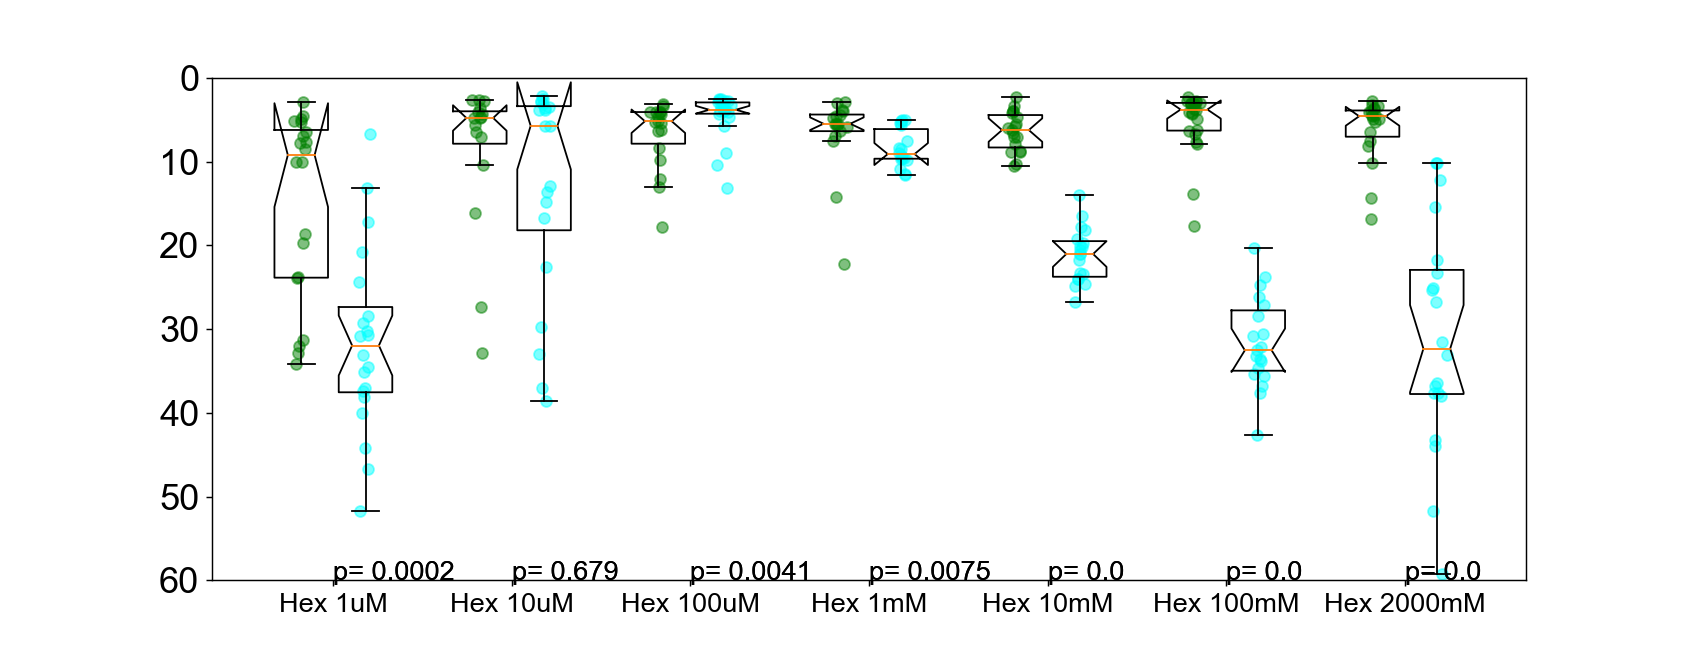

comparing w1118 (MS28) with Or42a SF (MS74xMS133)
w1118 (MS28)
lilliefors(0.2674816391604997, 0.0009999999999998899)


Or42a SF (MS74xMS133)
lilliefors(0.1402522126368621, 0.3813451003708546)


levene: LeveneResult(statistic=0.03725241207226465, pvalue=0.8479799523429509)
ranksums test: RanksumsResult(statistic=-3.7599623765631924, pvalue=0.0001699389127330722)
-0.18
0.18
comparing w1118 (MS28) with Or42a SF (MS74xMS133)
w1118 (MS28)
lilliefors(0.3273380941665913, 0.0009999999999998899)


Or42a SF (MS74xMS133)
lilliefors(0.26641512274221113, 0.0009999999999998899)


levene: LeveneResult(statistic=1.8330551906131998, pvalue=0.18469877498120757)
ranksums test: RanksumsResult(statistic=-0.4138644509785587, pvalue=0.6789733796771504)
0.8200000000000001
1.18
comparing w1118 (MS28) with Or42a SF (MS74xMS133)
w1118 (MS28)
lilliefors(0.2605074339533563, 0.0024043900197164864)


Or42a SF (MS74xMS133)
lilliefors(0.30236963474123757, 0.0009999999999998899)


levene: LeveneResult(statistic=1.18982

In [12]:
Hex_path = Path(root_path, '4H3O')

hex_conc_to_comp = [
    'Hex 1uM',
    'Hex 10uM',
    'Hex 100uM',
    'Hex 1mM',
    'Hex 10mM',
    'Hex 100mM',
    'Hex 2000mM']

comparison = [
    'w1118 (MS28)',
    'Or42a SF (MS74xMS133)'
]
colors = ['green', 'cyan']

df_for_export = plot_pairwise_comparisons(comparison, hex_conc_to_comp, colors, 
                                          savename='w1118_vs_Or42a_4H3O.svg', path=Hex_path)

#export_pairwise_test
# For export, first correct the label names
corrected_group_names = []

for current_data in df_for_export:
    labels = current_data.drop_duplicates(subset = ["Group"])['Group'] #extract unique group names
    print(labels)


    temp_data = current_data.replace(
        ['w1118 (MS28) Hex 1uM', 'Or42a SF (MS74xMS133) Hex 1uM', 
         'w1118 (MS28) Hex 10uM', 'Or42a SF (MS74xMS133) Hex 10uM', 
         'w1118 (MS28) Hex 100uM', 'Or42a SF (MS74xMS133) Hex 100uM',
         'w1118 (MS28) Hex 1mM', 'Or42a SF (MS74xMS133) Hex 1mM',
         'w1118 (MS28) Hex 10mM', 'Or42a SF (MS74xMS133) Hex 10mM',
         'w1118 (MS28) Hex 100mM', 'Or42a SF (MS74xMS133) Hex 100mM',
         'w1118 (MS28) Hex 2000mM', 'Or42a SF (MS74xMS133) Hex 2000mM'],
        
        ['wild type 1:9e6','Or42a SF 1:9e6',
         'wild type 1:9e5', 'Or42a SF 1:9e5',
         'wild type 1:9e4', 'Or42a SF 1:9e4',
         'wild type 1:9e3', 'Or42a SF 1:9e3',
         'wild type 1:9e2', 'Or42a SF 1:9e2',
         'wild type 1:90', 'Or42a SF 1:90',
         'wild type 1:4', 'Or42a SF 1:4']
        )
    
    corrected_group_names.append(temp_data)
    
    new_labels = temp_data.drop_duplicates(subset = ["Group"])['Group'] #extract unique group names
    print(new_labels)
    
shared_functions.export_pairwise_test(corrected_group_names, savepath=savepath_for_stats,
                                      savename='SIFig5C_Or42a', parametric=False,
                                      no_of_groups=19)

G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\4H3O\Hex 10uM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\4H3O\Hex 100uM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\4H3O\Hex 1mM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\4H3O\Hex 10mM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\4H3O\Hex 100mM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\4H3O\Hex 500mM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\4H3O\Hex 2000mM


<IPython.core.display.Javascript object>


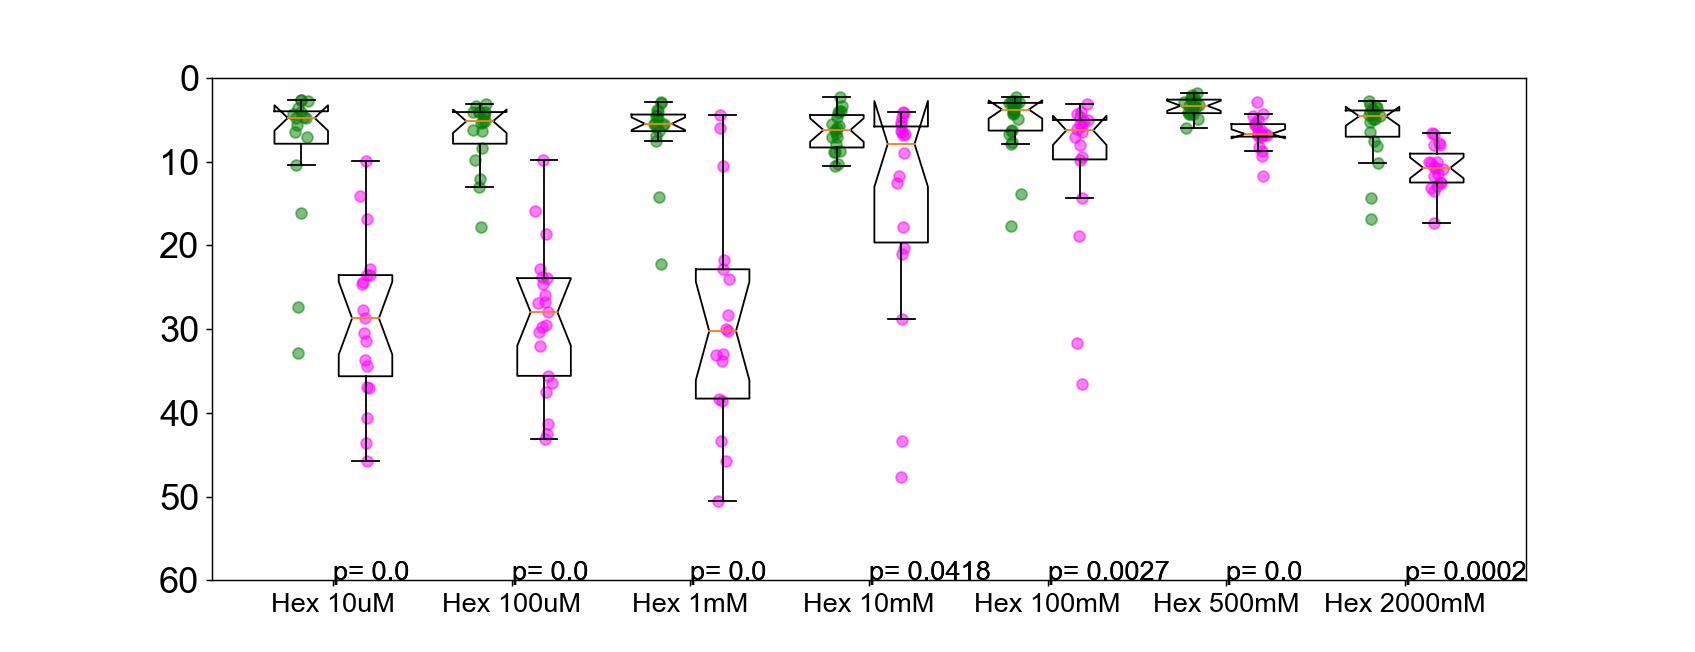

comparing w1118 (MS28) with Or42b SF (MS92xMS133)
w1118 (MS28)
lilliefors(0.3273380941665913, 0.0009999999999998899)


Or42b SF (MS92xMS133)
lilliefors(0.106525294077985, 0.8135454683019364)


levene: LeveneResult(statistic=1.2102013184916622, pvalue=0.27925274401774075)
ranksums test: RanksumsResult(statistic=-4.271616851534766, pvalue=1.9406079488099642e-05)
-0.18
0.18
comparing w1118 (MS28) with Or42b SF (MS92xMS133)
w1118 (MS28)
lilliefors(0.2605074339533563, 0.0024043900197164864)


Or42b SF (MS92xMS133)
lilliefors(0.10065950910867255, 0.8279876600316755)


levene: LeveneResult(statistic=7.364934567817306, pvalue=0.01003939836484781)
ranksums test: RanksumsResult(statistic=-5.183612762334901, pvalue=2.1762854877734524e-07)
0.8200000000000001
1.18
comparing w1118 (MS28) with Or42b SF (MS92xMS133)
w1118 (MS28)
lilliefors(0.3085256857564511, 0.0009999999999998899)


Or42b SF (MS92xMS133)
lilliefors(0.12309309640968952, 0.6958833540553349)


levene: LeveneResult(statistic=10.802927588

In [14]:
hex_conc_to_comp = [
    'Hex 10uM',
    'Hex 100uM',
    'Hex 1mM',
    'Hex 10mM',
    'Hex 100mM',
    'Hex 500mM', 
    'Hex 2000mM']

comparison = [
    'w1118 (MS28)',
    'Or42b SF (MS92xMS133)'
]
colors = ['green', 'magenta']

df_for_export = plot_pairwise_comparisons(comparison, hex_conc_to_comp, colors, 
                                          savename='w1118_vs_Or42b_4H3O.svg', path=Hex_path)

#export_pairwise_test
# For export, first correct the label names
corrected_group_names = []

for current_data in df_for_export:
    labels = current_data.drop_duplicates(subset = ["Group"])['Group'] #extract unique group names
    print(labels)


    temp_data = current_data.replace(
        ['w1118 (MS28) Hex 10uM', 'Or42b SF (MS92xMS133) Hex 10uM', 
         'w1118 (MS28) Hex 100uM', 'Or42b SF (MS92xMS133) Hex 100uM',
         'w1118 (MS28) Hex 1mM', 'Or42b SF (MS92xMS133) Hex 1mM',
         'w1118 (MS28) Hex 10mM', 'Or42b SF (MS92xMS133) Hex 10mM',
         'w1118 (MS28) Hex 100mM', 'Or42b SF (MS92xMS133) Hex 100mM',
         'w1118 (MS28) Hex 500mM', 'Or42b SF (MS92xMS133) Hex 500mM',   
         'w1118 (MS28) Hex 2000mM', 'Or42b SF (MS92xMS133) Hex 2000mM'],
        
        ['wild type 1:9e5', 'Or42b SF 1:9e5',
         'wild type 1:9e4', 'Or42b SF 1:9e4',
         'wild type 1:9e3', 'Or42b SF 1:9e3',
         'wild type 1:9e2', 'Or42b SF 1:9e2',
         'wild type 1:90', 'Or42b SF 1:90', 
         'wild type 1:17', 'Or42b SF 1:17',
         'wild type 1:4', 'Or42b SF 1:4']
        )
    
    corrected_group_names.append(temp_data)
    
    new_labels = temp_data.drop_duplicates(subset = ["Group"])['Group'] #extract unique group names
    print(new_labels)
    
shared_functions.export_pairwise_test(corrected_group_names, savepath=savepath_for_stats,
                                      savename='SIFig5C_Or42b', parametric=False,
                                      no_of_groups=19)

G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\4H3O\Hex 100uM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\4H3O\Hex 10mM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\4H3O\Hex 100mM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\4H3O\Hex 500mM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\4H3O\Hex 2000mM


<IPython.core.display.Javascript object>


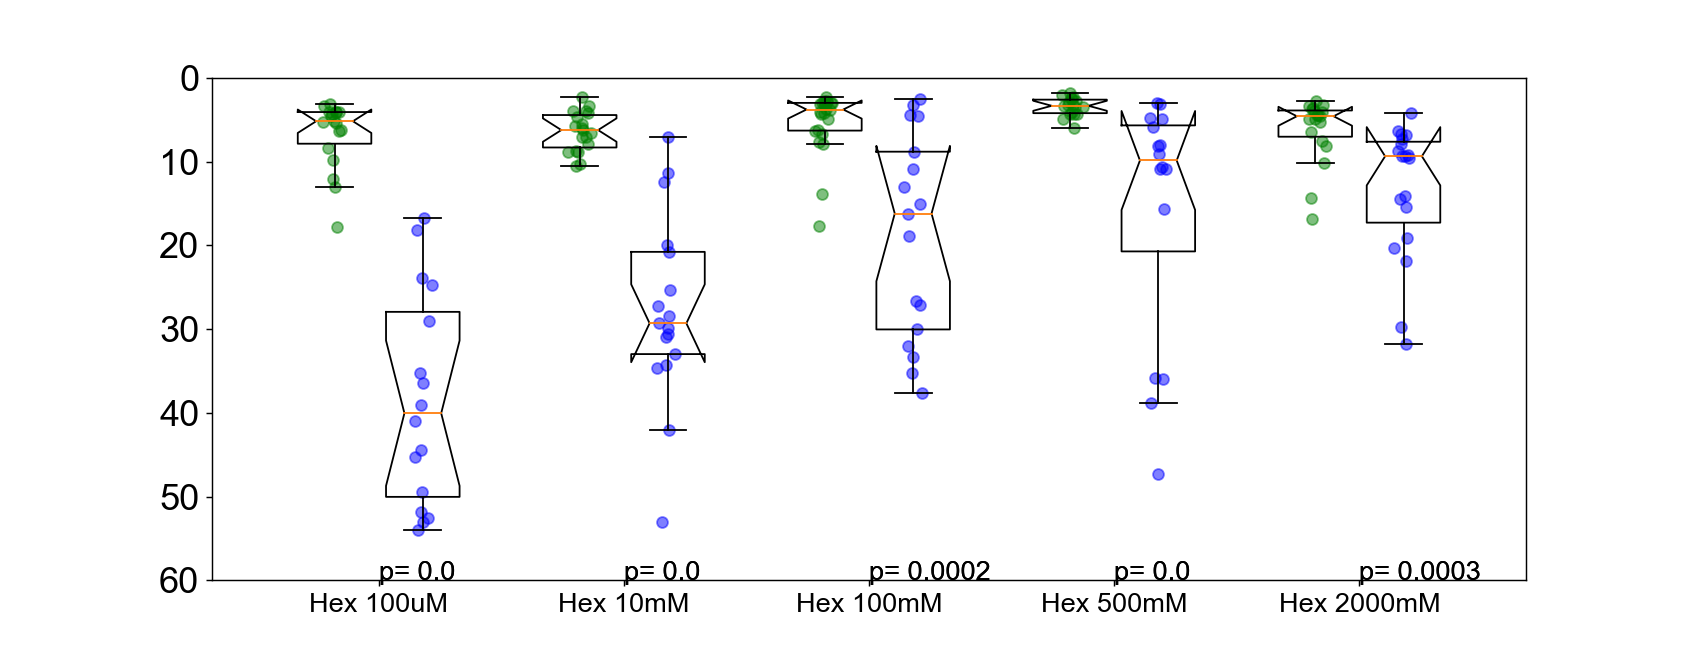

comparing w1118 (MS28) with Or1a SF (MS53xMS133)
w1118 (MS28)
lilliefors(0.2605074339533563, 0.0024043900197164864)


Or1a SF (MS53xMS133)
lilliefors(0.11889912485116283, 0.7784746851062836)


levene: LeveneResult(statistic=18.977029127251235, pvalue=0.00012749307965486079)
ranksums test: RanksumsResult(statistic=-4.933968749297833, pvalue=8.057533739429293e-07)
-0.18
0.18
comparing w1118 (MS28) with Or1a SF (MS53xMS133)
w1118 (MS28)
lilliefors(0.09672884875438936, 0.9091498122845281)


Or1a SF (MS53xMS133)
lilliefors(0.15127460371767865, 0.3802185829306655)


levene: LeveneResult(statistic=11.026078942645972, pvalue=0.00215352076102356)
ranksums test: RanksumsResult(statistic=-4.89572464734374, pvalue=9.79441303040954e-07)
0.8200000000000001
1.18
comparing w1118 (MS28) with Or1a SF (MS53xMS133)
w1118 (MS28)
lilliefors(0.24261696381783637, 0.001317842239485364)


Or1a SF (MS53xMS133)
lilliefors(0.15038365775768137, 0.3891765697367643)


levene: LeveneResult(statistic=28.612898354211787

In [15]:
hex_conc_to_comp = [
    'Hex 100uM',
    'Hex 10mM',
    'Hex 100mM',
    'Hex 500mM',
    'Hex 2000mM']

comparison = [
    'w1118 (MS28)',
    'Or1a SF (MS53xMS133)'
]
colors = ['green', 'blue']

df_for_export = plot_pairwise_comparisons(comparison, hex_conc_to_comp, colors, 
                                          savename='SIFig5C_w1118_vs_Or1a_4H3O.svg', 
                                          path=Hex_path)